In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
import rpy2.robjects as robjects

%matplotlib inline

In [2]:
plt.rcParams['font.family'] = 'IPAgothic'

In [3]:
data_set = robjects.r['load']('./data/.RData')

In [4]:
for row in data_set:
    print(row)

.Random.seed
data.cum.core30
data.cum.core30.2
data.cum.return
data.cum.return2
data.cum.train
data.cum.train.2
data.log.core30
data.log.return
data.log.return2
data.price
Date
label
price4
return4
sample1
sample2
X.price
X.return
Y.price
Y.return
yindex


In [5]:
data = pd.DataFrame(np.array(robjects.r['data.log.return']).T, columns=robjects.r['data.log.return'].colnames)

In [6]:
data.head()

,x1332,x1334,x1605,x1662,x1721,x1801,x1802,x1803,x1808,x1812,...,x9783,x9793,x9831,x9843,x9861,x9962,x9983,x9984,x9987,x9989
0,-1.197619,-0.796817,1.068386,0.478089,-1.480138,-0.896867,-0.563382,-0.763362,1.980263,-0.470589,...,0.527706,-0.330306,-1.174757,-1.809374,-0.199601,-2.037156,-2.003406,-1.755831,-2.181621,0.211491
1,-4.308359,-0.803217,0.635595,2.045705,0.279200,0.896867,1.123607,-0.383878,-1.980263,0.470589,...,-0.925321,-0.248447,-2.846634,-1.985881,0.696867,-0.794706,-1.472280,2.857337,-0.355100,-0.813156
2,-3.195160,-0.809721,0.210971,5.160477,0.925076,0.888895,-0.560226,0.383878,0.000000,1.398624,...,-0.132890,-0.749067,-4.348511,-0.863315,-0.796817,-1.933465,3.640839,0.000000,0.315707,-2.298126
3,0.000000,-0.816331,-1.593236,0.295421,1.824868,0.000000,1.671348,0.763362,0.000000,0.921666,...,-1.069529,0.250313,1.574836,0.432589,0.399202,0.702516,-0.165153,-2.055408,1.175102,0.543381
4,1.290340,0.816331,1.593236,0.147384,0.361011,0.441502,-1.111123,1.134228,0.000000,2.715099,...,1.600034,-3.908739,-1.257878,-1.741699,-0.099651,-0.269615,1.747723,-2.589141,1.775423,0.036121


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc22d12a9e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc2223fff98>]], dtype=object)

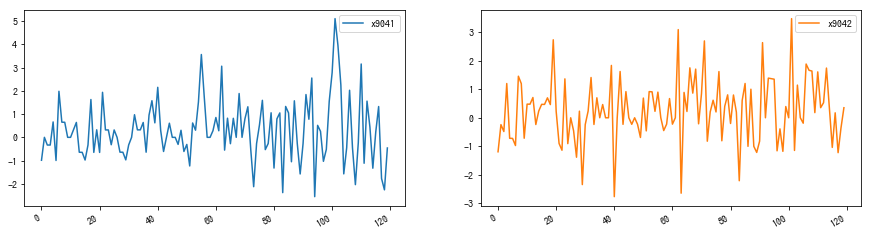

In [7]:
fig_data = data[['x9041', 'x9042']]
fig_data.plot(kind='line', subplots=True, layout=(1,2), figsize=(15,4))

In [8]:
# 自己回帰モデル、x9041
from statsmodels.tsa.ar_model import AR
model = AR(data['x9041']).fit(ic='aic')

In [9]:
model.params

const       0.257725
L1.x9041    0.159542
dtype: float64

In [10]:
model.pvalues

const       0.032509
L1.x9041    0.079598
dtype: float64

In [11]:
# 自己回帰モデル、X9042
model = AR(data['x9042']).fit(ic='aic')

In [12]:
model.params

const       0.295849
L1.x9042   -0.139717
dtype: float64

In [13]:
model.pvalues

const       0.003906
L1.x9042    0.124143
dtype: float64

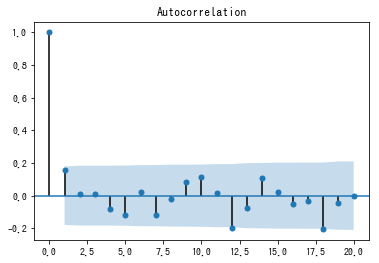

In [14]:
# x9041のコレログラム
sm.graphics.tsa.plot_acf(data['x9041'], lags=20)
plt.show()

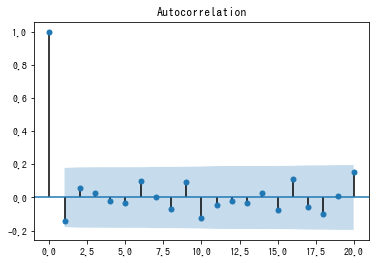

In [15]:
# x9042のコレログラム
sm.graphics.tsa.plot_acf(data['x9042'], lags=20)
plt.show()

- aicによる自己下位モデルでは次数1であった。
- 一方コレログラムを見るとラグが12,18のところが帰無仮説の信頼区間を超えている。（棄却域）

In [16]:
# x9041系列の自己回帰モデル
model = AR(data['x9041']).fit(ic='aic')
# 残差系列の取得
resid_series = model.resid
# 残差の自己回帰モデルの次数選択
print(AR(resid_series).fit(ic='aic').params)
print(AR(resid_series).fit(ic='aic').pvalues)

const    0.000847
L1.y     0.001777
dtype: float64
const    0.994283
L1.y     0.984707
dtype: float64


In [17]:
# x9042系列の自己回帰モデル
model = AR(data['x9042']).fit(ic='aic')
# 残差系列の取得
resid_series = model.resid
# 残差の自己回帰モデルの次数選択
print(AR(resid_series).fit(ic='aic').params)
print(AR(resid_series).fit(ic='aic').pvalues)

const    0.005953
L1.y    -0.001560
dtype: float64
const    0.952927
L1.y     0.986593
dtype: float64


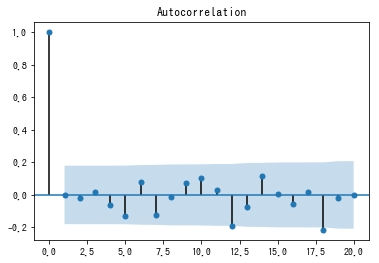

In [18]:
# x9041のコレログラム
sm.tsa.graphics.plot_acf(AR(data['x9041']).fit(ic='aic').resid, lags=20)
plt.show()

In [19]:
# x9041のljung-box検定, 帰無仮説は自己相関は無い
# 自己相関は無いを棄却できる⇒系列に相関がある
# 自己相関は無いを棄却できない⇒系列に相関がない
result = sm.stats.diagnostic.acorr_ljungbox(AR(data['x9041']).fit(ic='aic').resid, lags=1)
print(result)

(array([ 0.00038553]), array([ 0.98433458]))


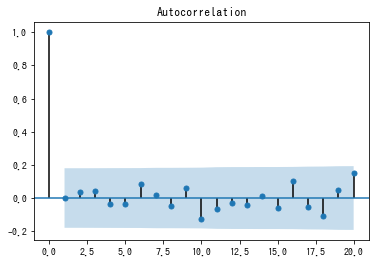

In [20]:
# x9042のコレログラム
sm.tsa.graphics.plot_acf(resid_series, lags=20)
plt.show()

In [21]:
# x9042のljung-box検定
result = sm.stats.diagnostic.acorr_ljungbox(AR(data['x9042']).fit(ic='aic').resid, lags=1)
result

(array([ 0.000297]), array([ 0.98625021]))

In [22]:
# 二乗の系列にも同様なことをしてみる。
# x9041の二乗の系列
series_sq_x9041 = AR(data['x9041']).fit(ic='aic').resid**2
series_sq_x9042 = AR(data['x9042']).fit(ic='aic').resid**2

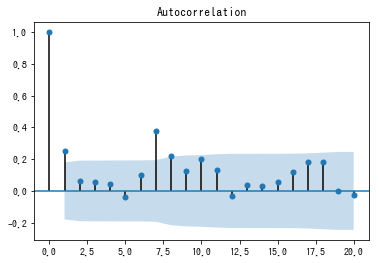

In [23]:
# x9041のコレログラムの作成、いくつかの有意な相関を示している。
sm.graphics.tsa.plot_acf(series_sq_x9041, lags=20)
plt.show()

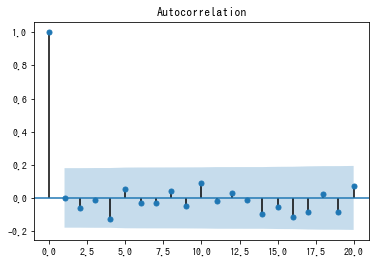

In [24]:
# x9042のコレログラムの作成
sm.graphics.tsa.plot_acf(series_sq_x9042, lags=20)
plt.show()

In [25]:
# ARモデルへの当てはめ,x9041
model = AR(series_sq_x9041).fit(ic='aic')
print(model.params)
print(model.pvalues)

const    0.718400
L1.y     0.215729
L2.y     0.013911
L3.y     0.022204
L4.y     0.024479
L5.y    -0.091486
L6.y     0.032408
L7.y     0.364640
dtype: float64
const    0.043851
L1.y     0.011757
L2.y     0.874410
L3.y     0.801168
L4.y     0.781240
L5.y     0.300248
L6.y     0.715054
L7.y     0.000025
dtype: float64


In [26]:
# ARモデルへの当てはめ、x9042
model = AR(series_sq_x9042).fit(ic='aic')
print(model.params)
print(model.pvalues)

const    1.177364
L1.y    -0.001110
dtype: float64
const    1.051257e-08
L1.y     9.904836e-01
dtype: float64


In [27]:
# x9041のljung-box検定,帰無仮説は自己相関は無い
# 自己相関は無いを棄却⇒自己相関はある
sm.stats.diagnostic.acorr_ljungbox(series_sq_x9041, lags=1)

(array([ 7.75678509]), array([ 0.00535111]))

In [28]:
# x9042のljung-box検定
sm.stats.diagnostic.acorr_ljungbox(series_sq_x9042, lags=1)

(array([ 0.00014497]), array([ 0.99039347]))

- x9042に対するAR(1)モデルの当てはめ残差はホワイトノイズとみなせそう
- x9041に対してのAR(1)モデルの当てはめ残差の二乗系列は時間依存しているため、残差の分散を定数と見ることができない。つまりホワイトノイズの過程を満たしていない。

In [29]:
# arch1+ar1モデル。arはパラメータmeanで指定
# arの次数を増やしたければlagで調整
from arch import arch_model

am = arch_model(data['x9041'], q=0, lags=1, mean='AR')

res = am.fit()

print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 198.8775890132257
Iteration:      2,   Func. Count:     15,   Neg. LLF: 196.08388770135227
Iteration:      3,   Func. Count:     24,   Neg. LLF: 193.86532518390044
Iteration:      4,   Func. Count:     32,   Neg. LLF: 193.75534446262827
Iteration:      5,   Func. Count:     39,   Neg. LLF: 193.6086421594022
Iteration:      6,   Func. Count:     45,   Neg. LLF: 193.02090980416313
Iteration:      7,   Func. Count:     51,   Neg. LLF: 192.99251365713062
Iteration:      8,   Func. Count:     57,   Neg. LLF: 192.98993425879667
Iteration:      9,   Func. Count:     63,   Neg. LLF: 192.98992276607015
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 192.98992276608675
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9
                           AR - ARCH Model Results                            
Dep. Variable:                  x9041   R-squared:       

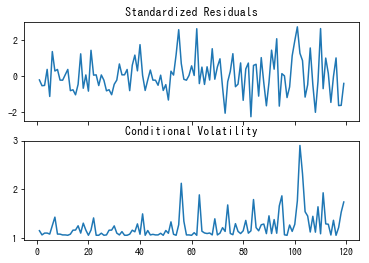

In [30]:
# 残差のプロットとボラティリティのプロット
res.plot()
plt.show()

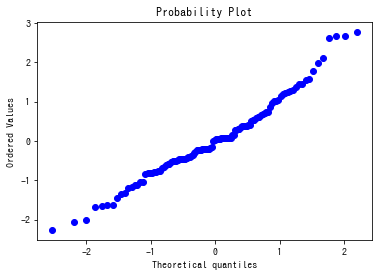

In [31]:
# 標準化残差のq-qプロット
# 過程が正しければ標準化残差は標準正規分布に乗るはずである。
# 直線が消えたのはマジで謎です。
a = res.resid / res.conditional_volatility
scipy.stats.probplot(a, plot=plt)
plt.show()